# Gene expression part 01
### Credit: Griffin Chure

In this script, we'll learn some basic facts about images, how to read them in matlab, and the basic principles of thresholding. On the course website (link here) there are two images that we will analyze to extract some information  about gene expression. While both of these images are of the same field  of view, one was taken with phase contrast (`noLac_phase_0008.tif`) while th other was taken with fluorescence (`noLac_FITC_0008.tif`). We'll use the fluorescence image as a measure of the gene expression of a fluorescent  reporter, so it is best to not use it for segmentation as to not bias our results. For identifying the single bacteria, we'll use thresholding to segment the phase image.

It is important to remember that an image is nothing but data - it is an array of points with a specific value called pixels. The values that these pixels can take is related to the construction of the camera and is measured as 'bit depth'. To determine the range of pixel values an N bit image can take, we simply need to compute $2^N - 1$. This subtraction of 1 is because 0 can be a pixel value as well. For example, a 16-bit image can have pixels on the range of 0 $\rightarrow$ ($2^{16} -1) = 0 \rightarrow 65535$. Let's begin by loading the phase contrast image into matlab as an array of values.

In [1]:
% Change the working director to where the images are in case we are not there
cd('~/Documents/PhD/RPGroup-PBoC_github/mbl_pboc_2016/data/ecoli_images/')

% Read the image
imPhase = imread('noLac_phase_0008.tif');

To extract some information about the phase image, we can use MATLABs "whos" directive. 

In [2]:
whos imPhase

Name            Size                Bytes  Class     Attributes

  imPhase      1040x1392            2895360  uint16


Notice that this gives us information regarding the name, size, bytes, and class (bit-depth). We can see that our image has a resolution of 1024 $\times$ 1344 and is about 2.7 MB. To look at the image, we can use the `imshow` command, but we need to think about how the image will be scaled.

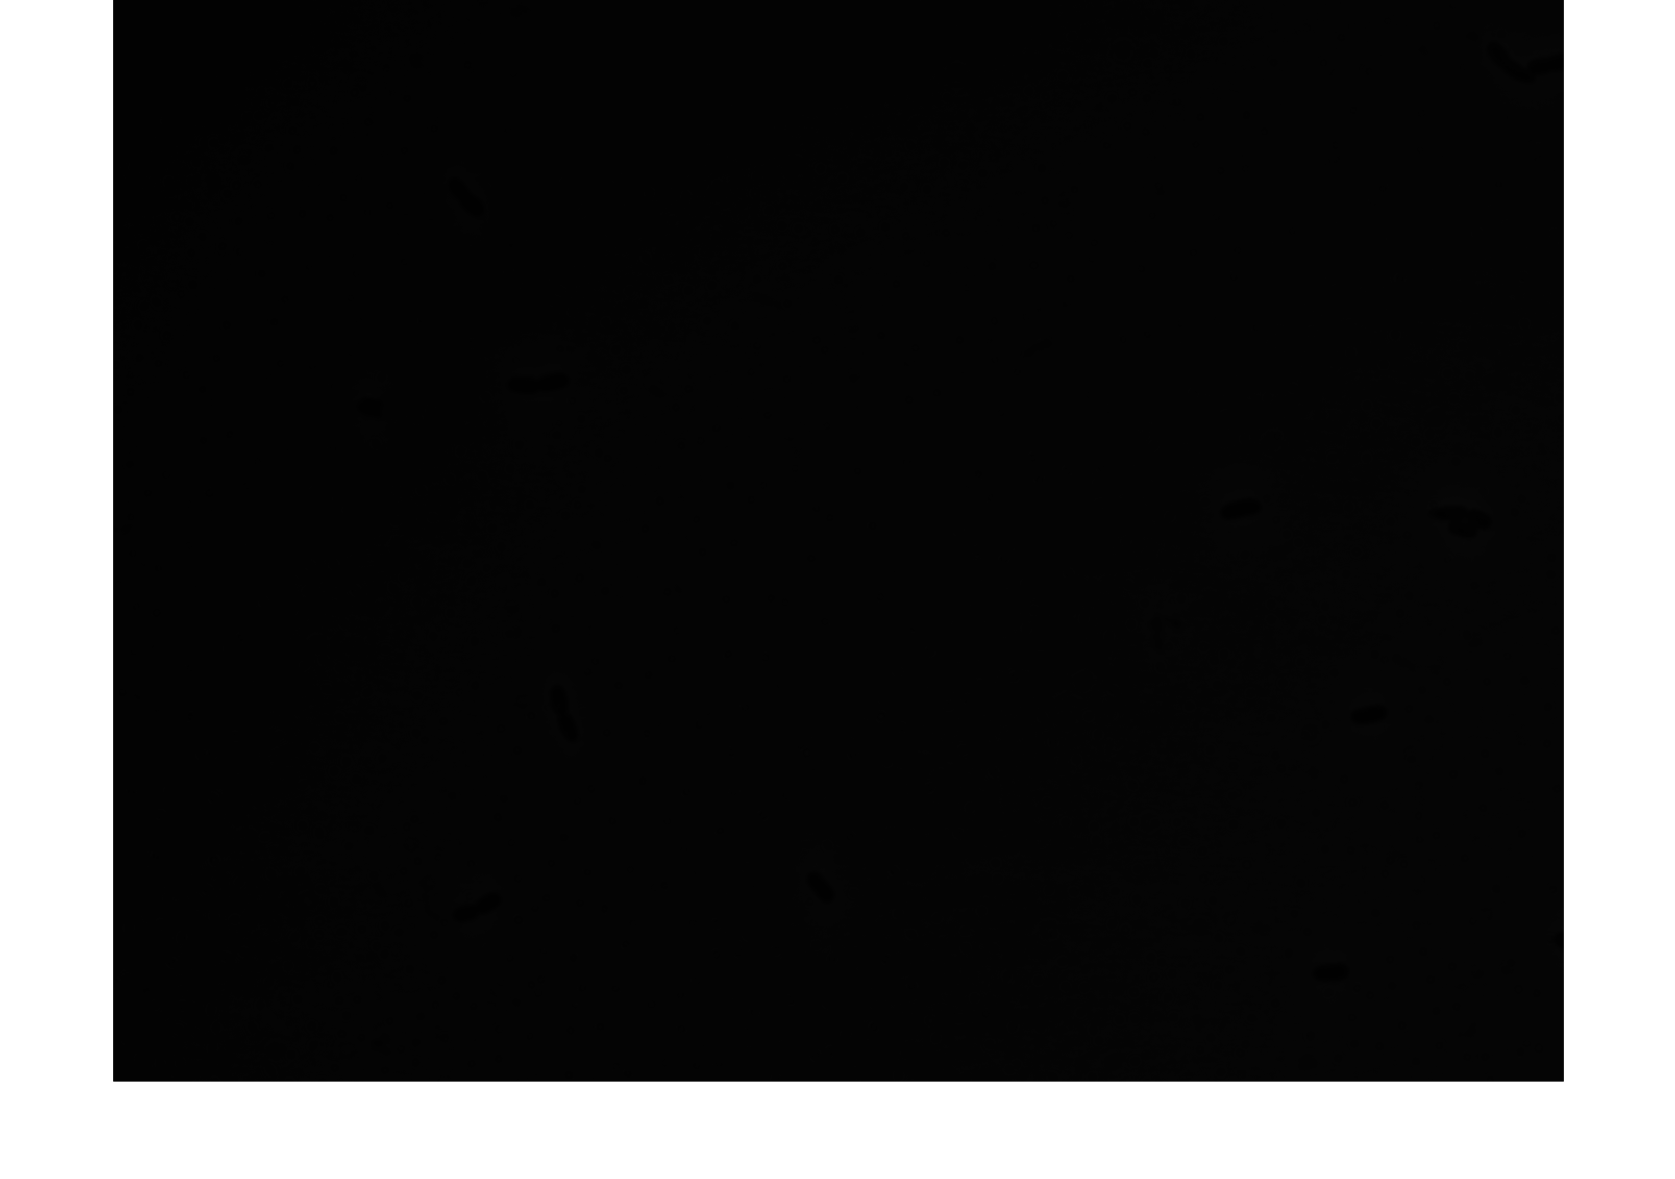

In [3]:
imshow(imPhase);

Running the above command shows a seemingly black image. However, if you use the "Data Cursor" icon in the image window and click around, you'll be able to see that the pixels actually have different values. We can scale the image to a certain range of values within the imshow directive.

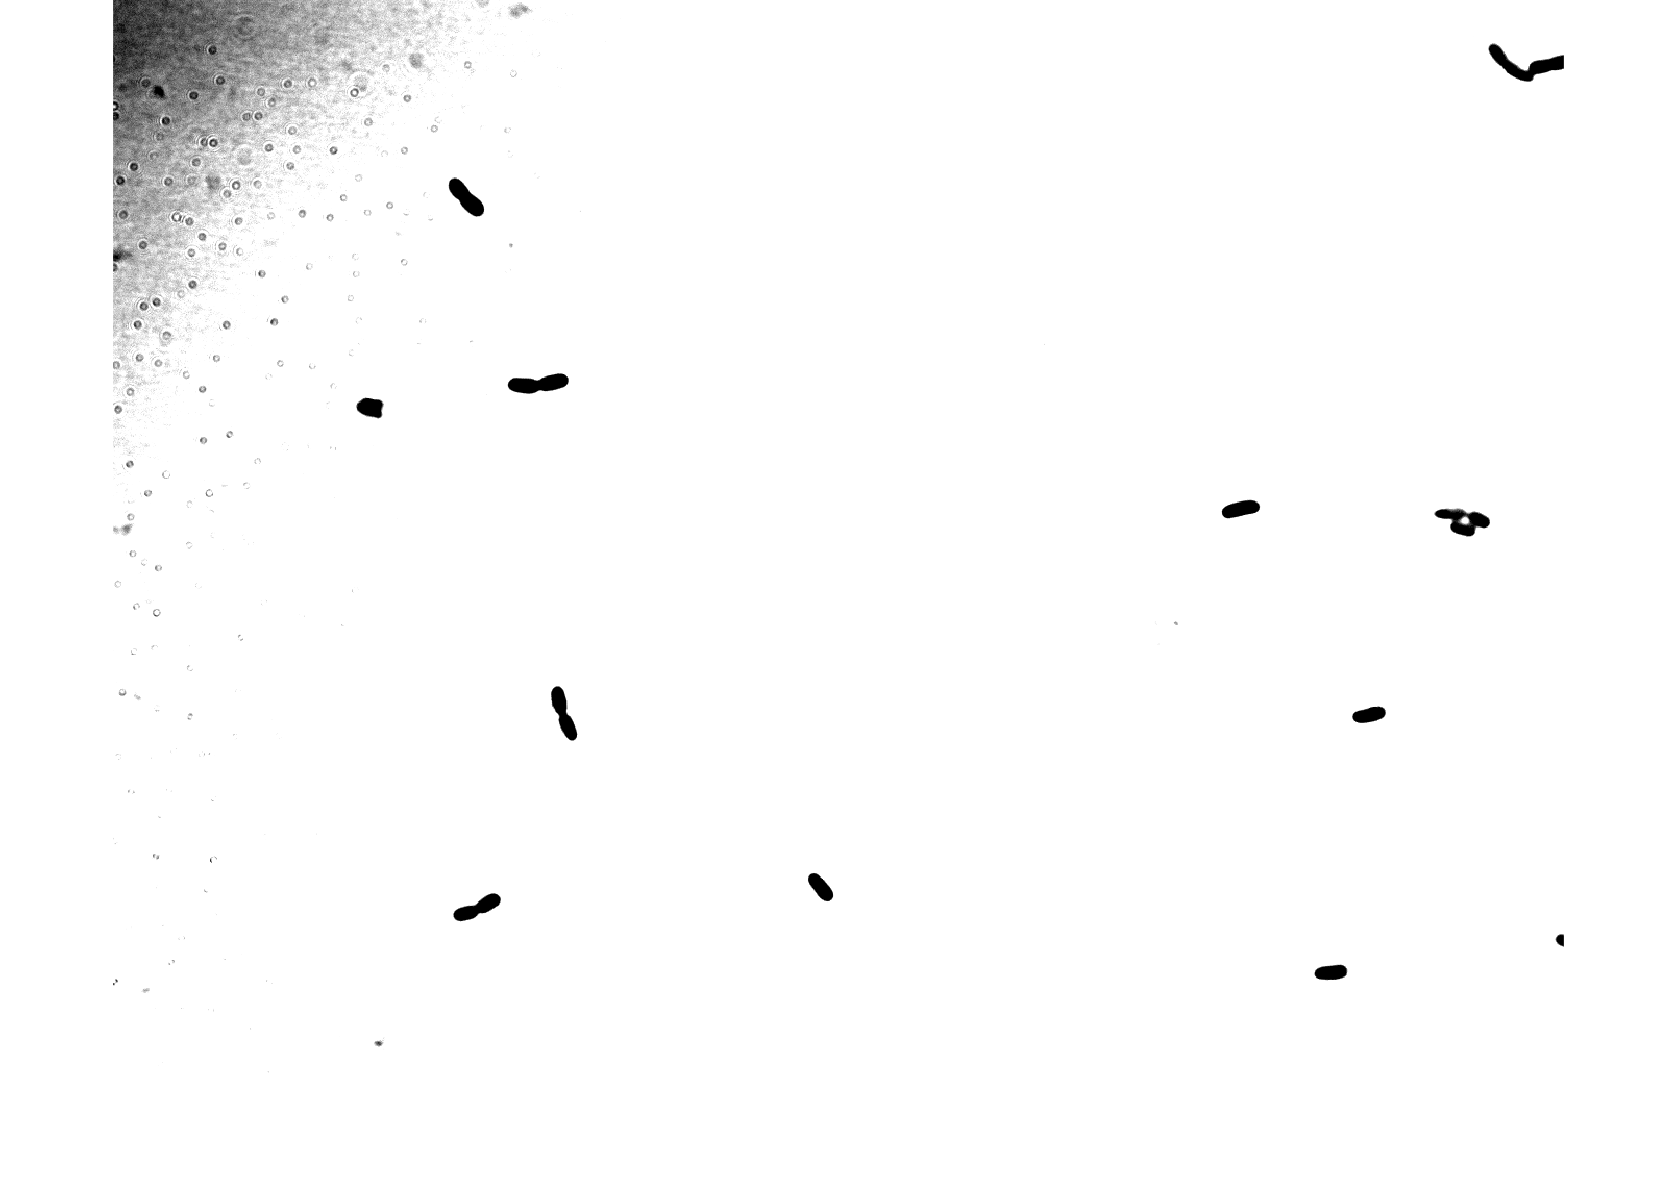

In [4]:
imshow(imPhase, [600, 800]);

The above command will display the image where the pixel value 600 or below will be black and 800 or above will be white. To automatically scale the image such that the lowest pixel value is black and the highest is white, we can simply leave a pair of empty open/close brackets. 

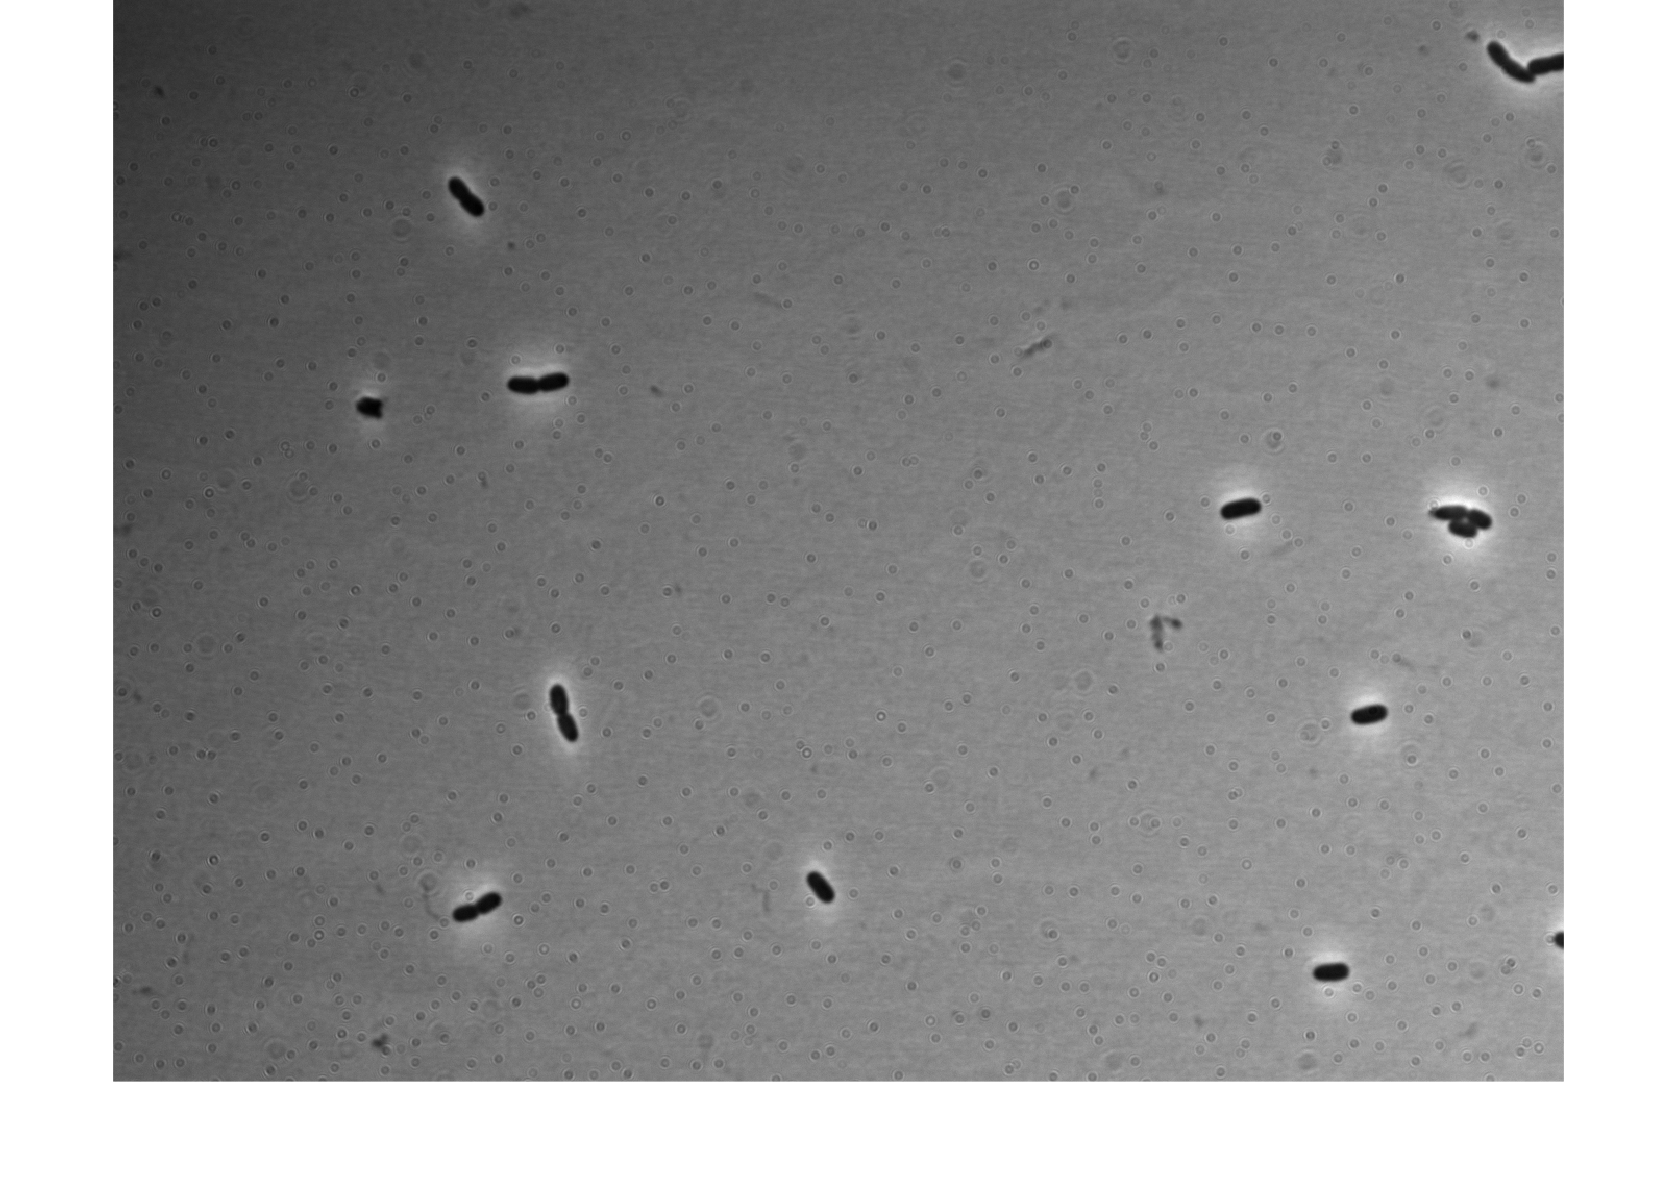

In [5]:
imshow(imPhase, []);

One interesting feature to plot is the distribution of pixel values. We can generate a histogram of all the numbers that are contained in our image by using the `imhist` function.

If we were apply this function directly to our 12-bit image since matlab thinks is a 16-bit image it would generate $2^{16}$ bins for the histogram. In order to override that default option we will add an extra argument that is the number of bins we want for our histogram

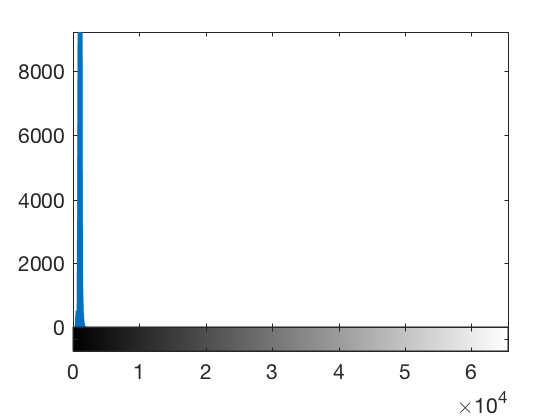

In [12]:
imhist(imPhase, 2^12);

The histogram looks very squished. It's hard to get a good hold on the range of values to choose a threshold. Let's rescale the x-axis so it only goes from the lowest to the highest value contained in the image.

To do this we first need to find this maximum and minimum pixel value. Since matlab likes to work in matrices if I were to use the `max` or the `min` functions that would return the maximum and minimum **of each column of the matrix**. But we want the **global** maximum or minimum. There are at least 2 ways to handle this in matlab:
1. Use `max(max(imPhase))` such that the first `max` gets the maximum per column and the second one returns the maximum of these maximums.
2. Use the trick to transform a 2D matrix into a 1D array `max(imPhase(:))`.

I personally think the second option is more elegant, so we'll stick with it.

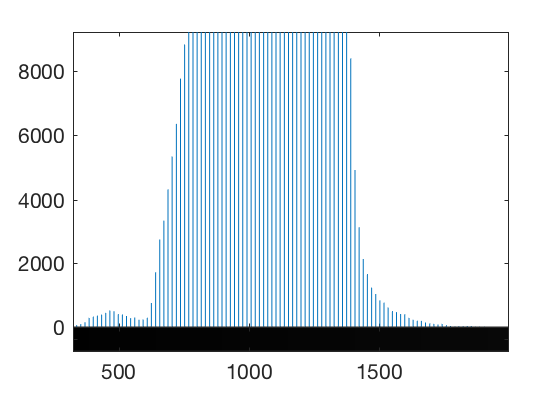

In [18]:
maxVal = max(imPhase(:));
minVal = min(imPhase(:));

imhist(imPhase, 2^12);
xlim([minVal, maxVal])

We can see that there are roughly two peaks: One that corresponds to the bacteria pixels, and one that corresponds to the background.

Let's try plotting this histogram on a log-log scale to see if we can distinguish these peaks better. To change a current axis to log-scale in matlab we use the following command:

`set(gca, 'Xscale', 'log')`,

where `gca` stands for **g**et **c**urrent **a**xis. So what this is telling matlab is to get the current plot that is open, take the x axis and transform that scale into log. We can do the same for the y axis simply by writing `'Yscale'` instead.

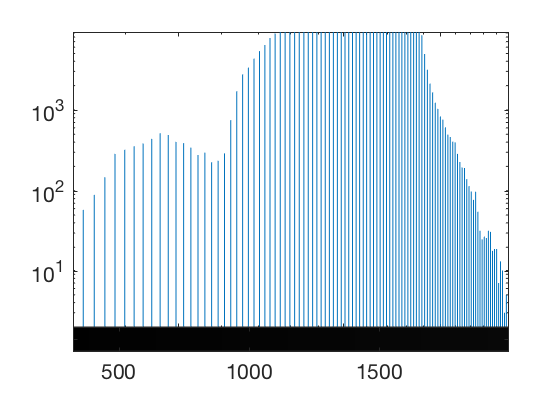

In [19]:
maxVal = max(imPhase(:));
minVal = min(imPhase(:));

imhist(imPhase, 2^12);
xlim([minVal, maxVal])
set(gca, 'Xscale',  'log')
set(gca, 'Yscale',  'log')

Now in this log-log plot its clear that there are two peaks. The bacteria appeared as black rods on a bright background. The peak at the lower pixel values therefore should correspond to the bacteria. 

Looking at the histogram, we see that a reasonable threshold to use would be 600. Let's say that all the bacteria exist below this threshold. To look at this image, we'll use matlab's logic operations to find the pixels below a certain value. Below are some examples. 

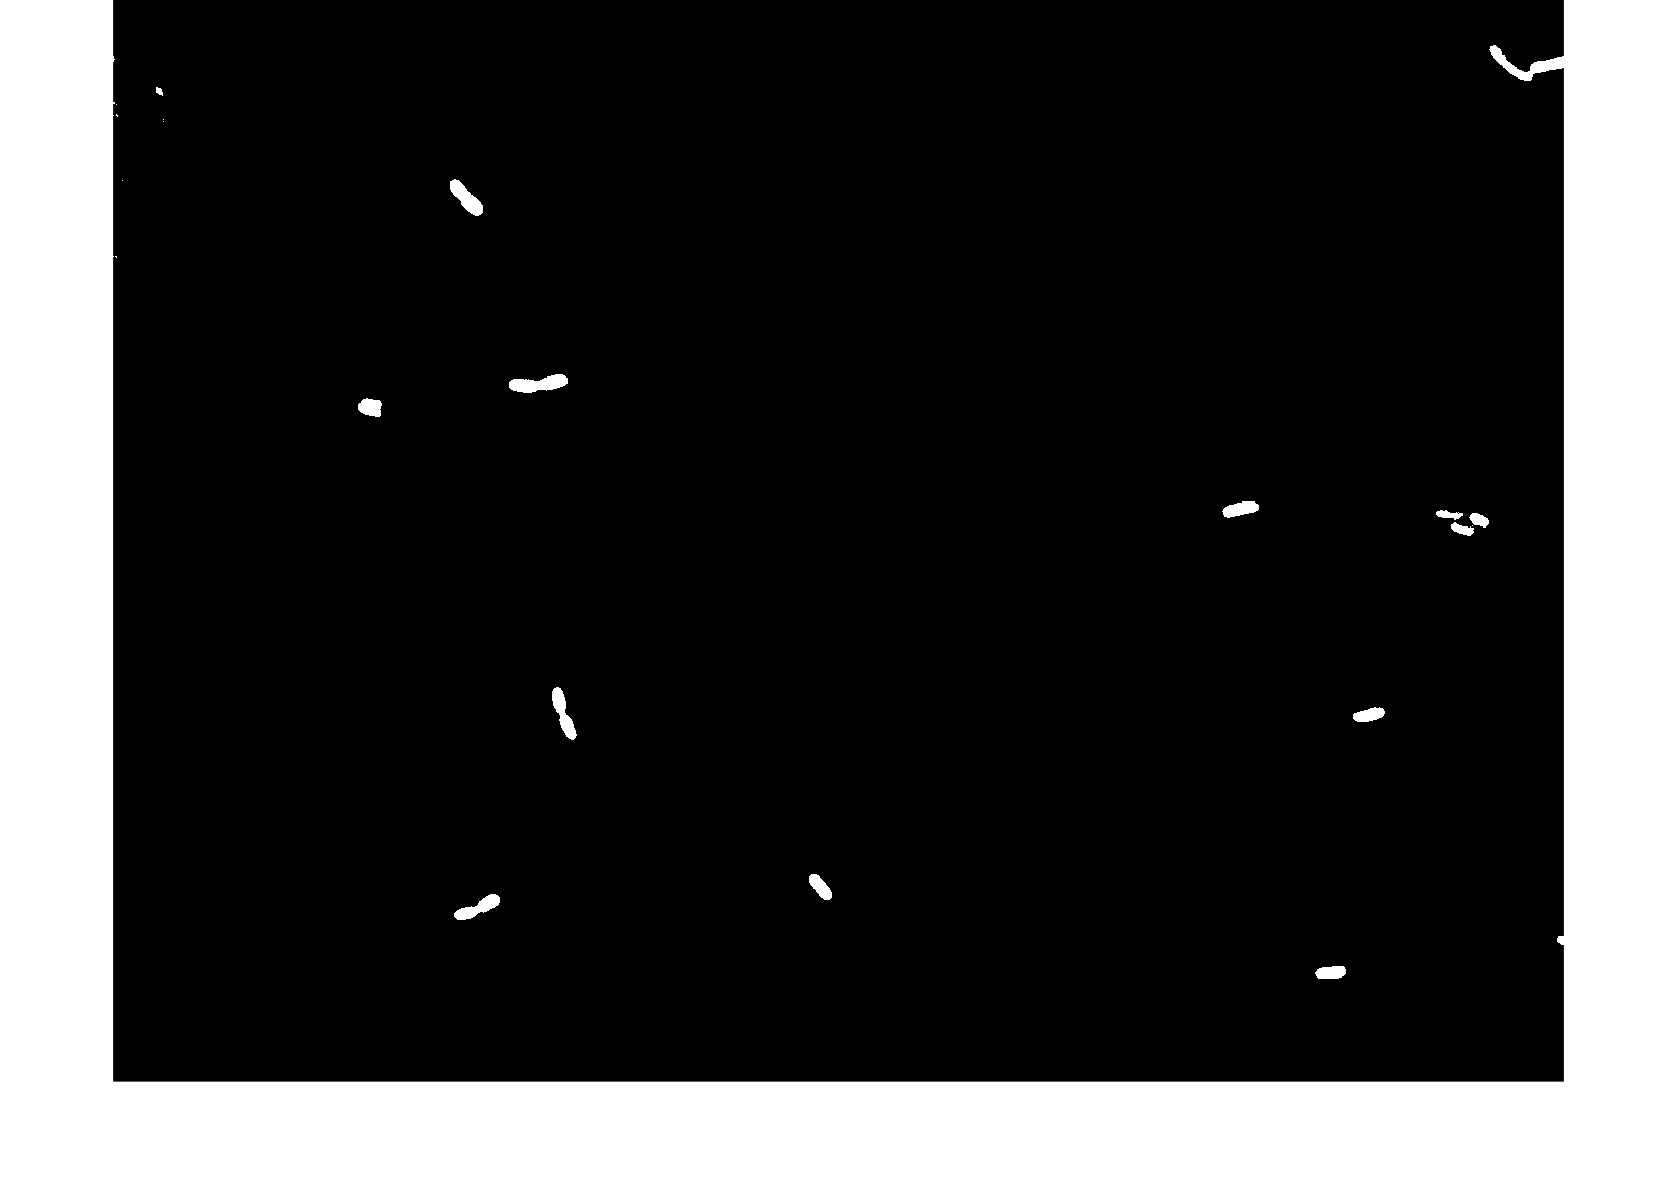

In [20]:
threshold = 600;
imThresh = imPhase < threshold; % Generates binary image with 0 for the pixels
                                % greater than threshold and 1 for the rest.
imshow(imThresh);                                

Voila! This looks like a very decent segmentation.

One cool trick that I recently learn is that we can look at the differences between two images by using the function `imshowpair`. Let's look at it for fun.

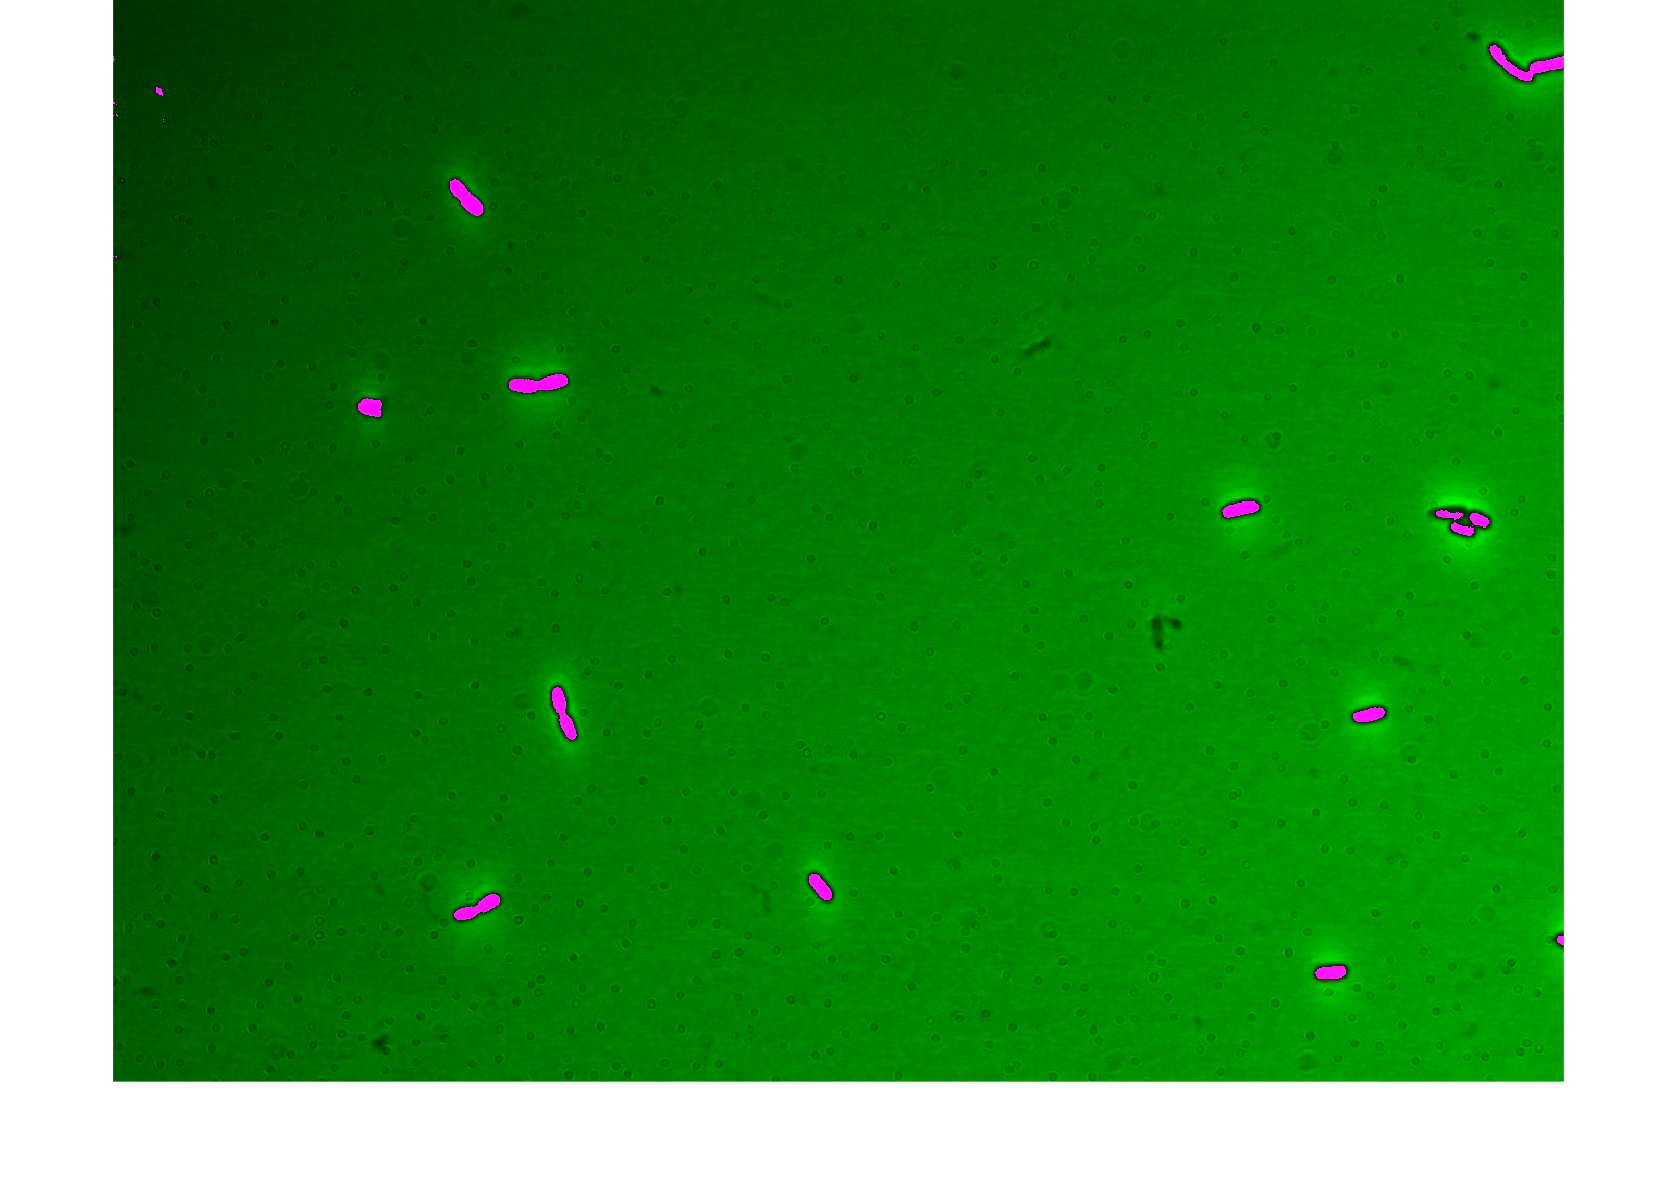

In [21]:
imshowpair(imPhase, imThresh)